# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [7]:
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style to white
sns.set_style("white")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [8]:
tips = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv', sep=',')

In [9]:
tips.head(5)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [10]:
del tips['Unnamed: 0']
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 5. Plot the total_bill column histogram

<Axes: xlabel='total_bill', ylabel='Count'>

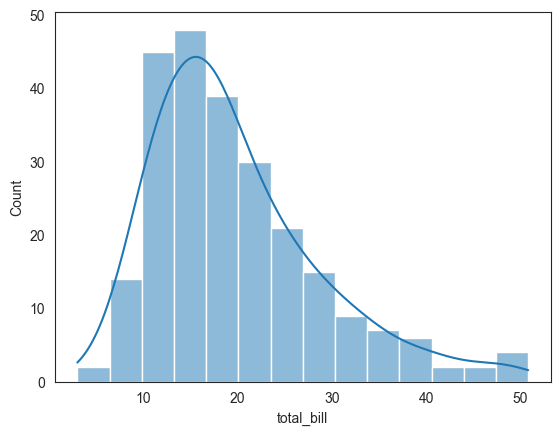

In [26]:
# kde: Kernel Density Estimate (KDE)
# kde=True: adds a smooth, continuous representation of the data's distribution curve overlaid on the histogram
sns.histplot(data=tips, x='total_bill', kde=True)

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

<Axes: xlabel='total_bill', ylabel='tip'>

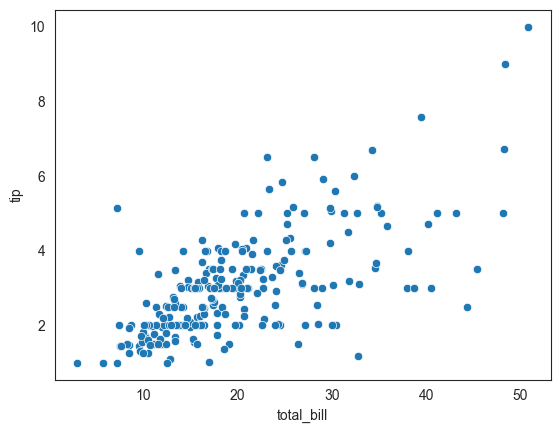

In [25]:
sns.scatterplot(x=tips.total_bill, y=tips.tip, data=tips)

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

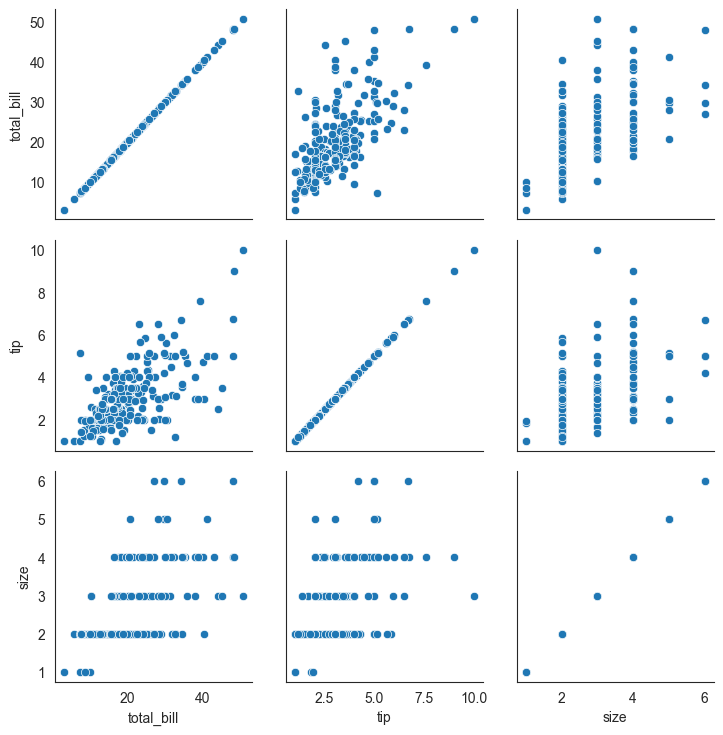

In [ ]:
# PairGrid shows pairwise relationships between data elements
g = sns.PairGrid(tips, vars=['total_bill', 'tip', 'size'])
g.map(sns.scatterplot)

# 1. As bills get larger, tips tend to increase
# 2. Larger party sizes generally correspond to higher total bills

### Step 8. Present the relationship between days and total_bill value

<Axes: xlabel='total_bill', ylabel='day'>

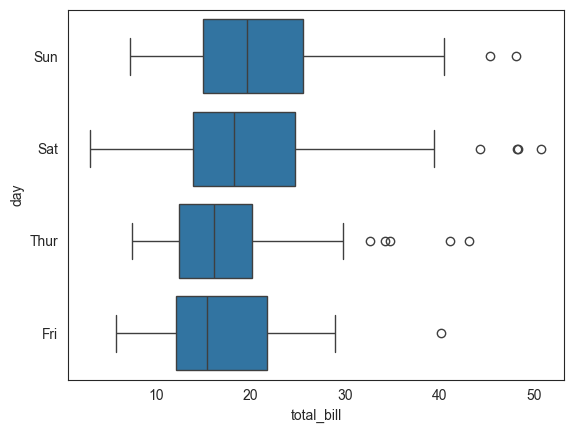

In [29]:
# Why use boxplot?
# Shows the distribution of total bills for each day
# Display key statistics like median, quartiles, and outliers
# Compare bill patterns across different days

sns.boxplot(x='total_bill', y='day', data=tips)

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

<Axes: xlabel='tip', ylabel='day'>

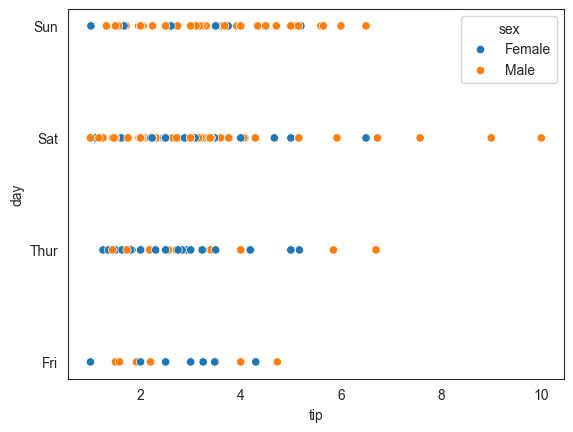

In [ ]:
sns.scatterplot(
    data=tips,
    x='tip',
    y='day',
    hue='sex'
)

# The dots are overlapping.

<Axes: xlabel='total_bill', ylabel='day'>

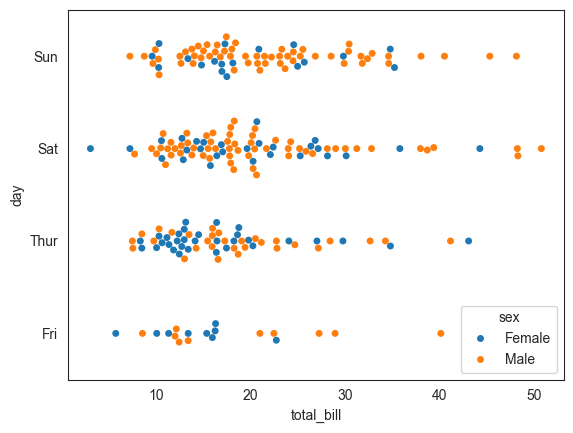

In [ ]:
# To avoid dots from overlapping, use swarm plot
sns.swarmplot(data=tips, x="total_bill", y="day", hue="sex")

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

<Axes: xlabel='total_bill', ylabel='day'>

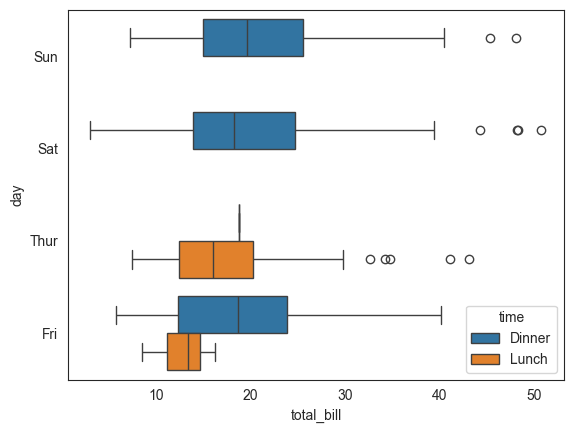

In [ ]:
sns.boxplot(x='total_bill', y='day', hue='time', data=tips)
# There are no lunch on weekends.

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

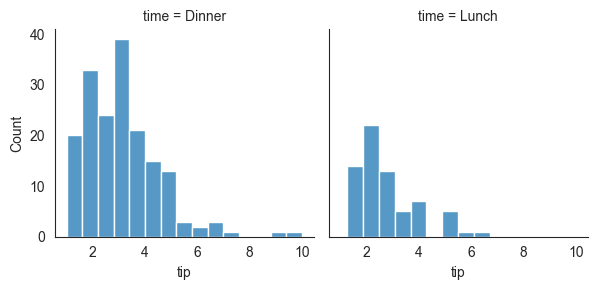

In [ ]:
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

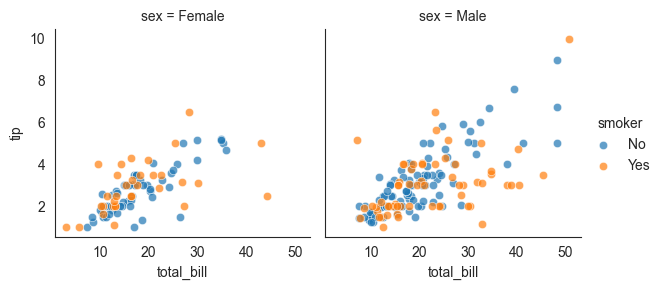

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()


# Most high-value outliers appear in the male category
# Female data points are more tightly clustered

### BONUS: Create your own question and answer it using a graph.

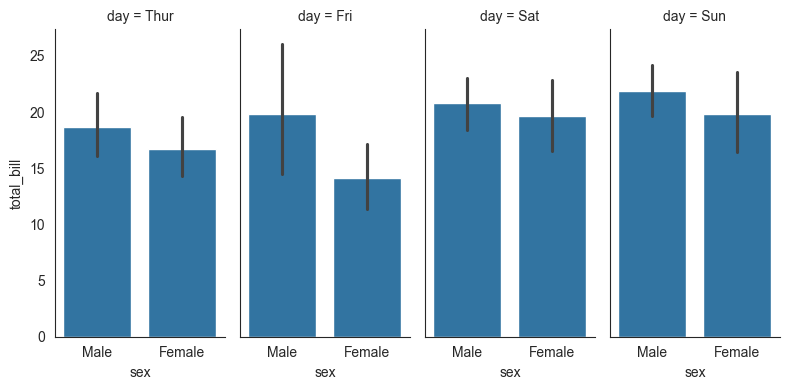

In [42]:
# How does the average total bill amount differ between males and females across different days?

day_order = ['Thur', 'Fri', 'Sat', 'Sun']

g = sns.FacetGrid(tips, 
                  col="day", 
                  col_order=day_order,
                  height=4, 
                  aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

# Males generally have higher total bills across most days.